In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib
import seaborn as sns
matplotlib.style.use('seaborn')

/tmp/ipykernel_12897/3317725158.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [3]:
df = pd.read_json('data/nobel_winners_cleaned.json')
df.head()

,link,name,year,category,country,text,date_of_birth,date_of_death,place_of_birth,place_of_death,gender,award_age,born_in,mini_bio,bio_image
0,http://en.wikipedia.org/wiki/William_Lawrence_...,William Lawrence Bragg,1915,Physics,Australia,"William Lawrence Bragg , Physics, 1915",1890-03-31T00:00:00.000,1971-07-01T00:00:00.000,Adelaide,Ipswich,male,25,None,"<p><b>Sir William Lawrence Bragg</b>, <span cl...",full/b4d88a037d9c0f170526571118b81450d99a8c4b.jpg
1,http://en.wikipedia.org/wiki/Brian_Schmidt,Brian Schmidt,2011,Physics,Australia,"Brian Schmidt , born in the United States , P...",1967-02-24T00:00:00.000,None,Missoula,None,male,44,None,"<p><b>Brian Paul Schmidt</b> <span class=""noex...",full/a5f763b828006e704cb291411b8b643bfb91886c.jpg
2,http://en.wikipedia.org/wiki/Barry_Marshall,Barry Marshall,2005,Physiology or Medicine,Australia,"Barry Marshall , Physiology or Medicine, 2005",1951-09-30T00:00:00.000,None,Kalgoorlie,None,male,54,None,"<p><b>Barry James Marshall</b> <span class=""no...",full/976cea55c7b67dbceee0d4935c97fec5f7da2822.jpg
3,http://en.wikipedia.org/wiki/Robin_Warren,J. Robin Warren,2005,Physiology or Medicine,Australia,"J. Robin Warren , Physiology or Medicine, 2005",1937-06-11T00:00:00.000,None,Adelaide,None,male,68,None,"<p><b>John Robin Warren</b> <span class=""noexc...",full/3262c0c444deb3995e1388da14c9b4f22c82f0a2.jpg
4,http://en.wikipedia.org/wiki/Peter_C._Doherty,Peter C. Doherty,1996,Physiology or Medicine,Australia,"Peter C. Doherty , Physiology or Medicine, 1996",1940-10-15T00:00:00.000,None,Brisbane,None,male,56,None,"<p><b>Peter Charles Doherty</b> <span class=""n...",full/cae91e7160f5fa613df8bb852b1655ca2e224039.jpg


In [4]:
# change 'Russia and Soviet Union' to Russia
df.loc[df["country"] == "Russia and Soviet Union", "country"] = "Russia"
df.loc[df["country"] == "Russia"]

,link,name,year,category,country,text,date_of_birth,date_of_death,place_of_birth,place_of_death,gender,award_age,born_in,mini_bio,bio_image
594,http://en.wikipedia.org/wiki/Ilya_Frank,Ilya Mikhailovich Frank,1958,Physics,Russia,"Ilya Mikhailovich Frank , Physics, 1958",1908-10-10T00:00:00.000,1990-06-22T00:00:00.000,Saint Petersburg,Moscow,male,50,None,None,None
595,http://en.wikipedia.org/wiki/Nikolay_Semyonov,Nikolay Semyonov,1956,Chemistry,Russia,"Nikolay Semyonov , Chemistry, 1956",1896-04-03T00:00:00.000,1986-09-25T00:00:00.000,Saratov,Moscow,male,60,None,None,None
596,http://en.wikipedia.org/wiki/Aleksandr_Solzhen...,Aleksandr Solzhenitsyn,1970,Literature,Russia,"Aleksandr Solzhenitsyn , Literature, 1970",1918-12-11T00:00:00.000,2008-08-03T00:00:00.000,Kislovodsk,Moscow,male,52,None,None,None
597,http://en.wikipedia.org/wiki/Mikhail_Sholokhov,Mikhail Sholokhov,1965,Literature,Russia,"Mikhail Sholokhov , Literature, 1965",1905-05-11T00:00:00.000,1984-02-21T00:00:00.000,Kruzhilin,Vyoshenskaya,male,60,None,None,None
598,http://en.wikipedia.org/wiki/Andrei_Sakharov,Andrei Sakharov,1975,Peace,Russia,"Andrei Sakharov , Peace, 1975",1921-05-21T00:00:00.000,1989-12-14T00:00:00.000,Moscow,Moscow,male,54,None,None,None
599,http://en.wikipedia.org/wiki/Leonid_Kantorovich,Leonid Kantorovich,1975,Economics,Russia,"Leonid Kantorovich , Economics, 1975",1912-01-19T00:00:00.000,1986-04-07T00:00:00.000,Saint Petersburg,Moscow,male,63,None,None,None
600,http://en.wikipedia.org/wiki/Nikolay_Basov,Nikolay Basov,1964,Physics,Russia,"Nikolay Basov , Physics, 1964",1922-12-14T00:00:00.000,2001-07-01T00:00:00.000,Usman,Moscow,male,42,None,None,None
601,http://en.wikipedia.org/wiki/Lev_Landau,Lev Landau,1962,Physics,Russia,"Lev Landau , born in then Russian Empire, now...",1908-01-22T00:00:00.000,1968-04-01T00:00:00.000,Baku,Moscow,male,54,None,None,None
602,http://en.wikipedia.org/wiki/Boris_Pasternak,Boris Pasternak,1958,Literature,Russia,"Boris Pasternak , Literature, 1958 (forced to ...",1890-02-10T00:00:00.000,1960-05-30T00:00:00.000,Moscow,Peredelkino,male,68,None,None,None
603,http://en.wikipedia.org/wiki/Pavel_Cherenkov,Pavel Cherenkov,1958,Physics,Russia,"Pavel Cherenkov , Physics, 1958",1904-07-28T00:00:00.000,1990-01-06T00:00:00.000,Novaya Chigla,Moscow,male,54,None,None,None


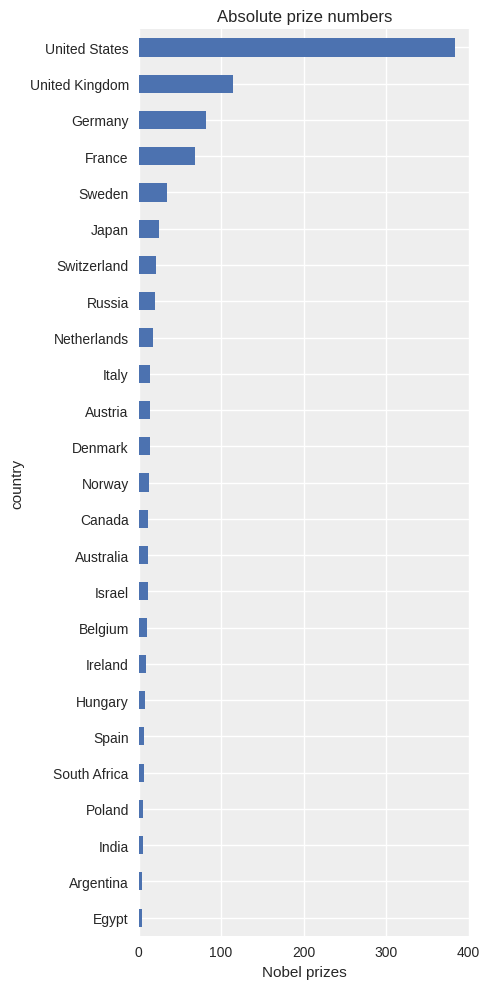

In [5]:
# df_countries = pd.read_json('data/winning_country_data.json')
# df_countries
ax = df.groupby("country").size().sort_values(ascending=True).tail(25).plot(kind='barh',figsize=[5,10],title='Absolute prize numbers')
ax.set_xlabel('Nobel prizes')
ax.set_facecolor('#eee')
plt.tight_layout()
plt.savefig('images/country_absolute_prize_numbers.png')


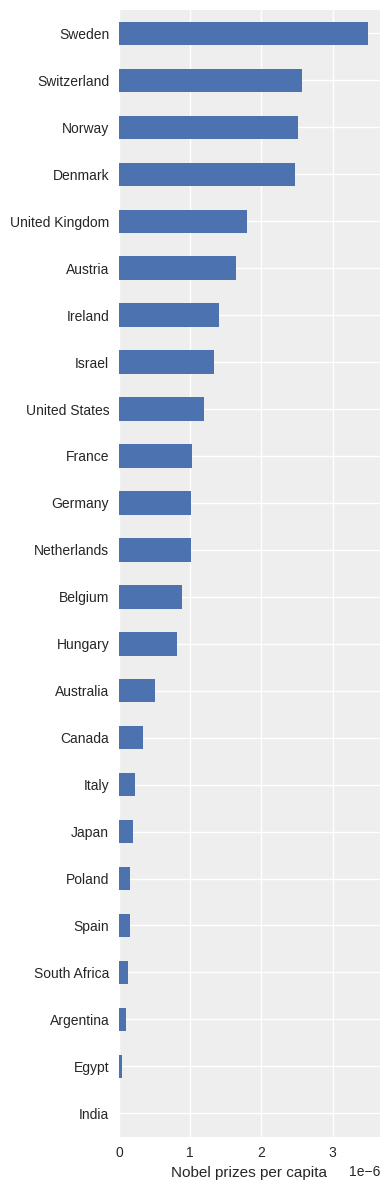

In [6]:
nat_group = df.groupby("country").size()
df_countries = pd.read_json("data/winning_country_data.json", orient="index")
df_countries["nobel_wins"] = nat_group
df_countries["nobel_wins_per_capita"] = (
    df_countries.nobel_wins / df_countries.population
)
# df_countries
ax = (
    df_countries[df_countries.nobel_wins > 2]
    .sort_values(by="nobel_wins_per_capita", ascending=True)
    .nobel_wins_per_capita.plot(
        kind="barh",
        figsize=[4, 12],
    )
)
ax.set_xlabel("Nobel prizes per capita")
ax.set_facecolor("#eee")
plt.tight_layout()
plt.savefig("images/country_relative_prize_numbers.png")

In [7]:
new_index = pd.Index(np.arange(1901,2025),name ='year')

by_year_nat_sz = df.groupby(['year','country']).size().unstack().reindex(new_index).fillna(0)

regions = [
{'label':'N. America',
'countries':['United States', 'Canada']},
{'label':'Europe',
'countries':['United Kingdom', 'Germany', 'France']},
{'label':'Asia',
'countries':['Japan', 'Russia', 'India']}
]

for region in regions:
    by_year_nat_sz[region['label']] = by_year_nat_sz[region['countries']].sum(axis=1)

In [8]:
df_regions = by_year_nat_sz[[r['label'] for r in regions]].cumsum()
df_regions

country,N. America,Europe,Asia
year,,,
1901,0.0,5.0,0.0
1902,0.0,8.0,0.0
1903,0.0,11.0,0.0
1904,0.0,14.0,1.0
1905,0.0,16.0,1.0
...,...,...,...
2020,380.0,257.0,48.0
2021,385.0,261.0,49.0
2022,391.0,263.0,49.0


In [9]:
import plotly.express as px

fig = px.line(
    df_regions,
    labels={"country": "Regions"},
    line_dash="country",
    line_dash_sequence=["solid", "dash", "dot"],
    height=800,
    width=800,
)
fig.show()

In [10]:
# use the line method with a suitable DataFrame
fig = px.line(df_regions)
fig.show()

In [11]:
import plotly.graph_objects as go

regions = [
    {"label": "N. America", "countries": ["United States", "Canada"]},
    {"label": "Europe", "countries": ["United Kingdom", "Germany", "France"]},
    {"label": "Asia", "countries": ["Japan", "Russia and Soviet Union", "India"]},
]

traces = []
for region in regions:
    name = region["label"]
    traces.append(
        go.Scatter(
            x=df_regions.index,
            y=df_regions[name],
            name=name,
            mode="lines",
            hovertemplate=f"{name}<br>%{{x}}<br>$%{{y}}<extra></extra>",
            line=dict(dash=["solid", "dash", "dot"][len(traces)]),
        )
    )

layout=go.Layout(height=800,width=800,xaxis_title='year',yaxis_title='cumulative prizes')
fig = go.Figure(traces,layout)
fig.show()

In [12]:
df_countries_category = df.groupby(['country','category']).size()
df_countries_category

country        category              
Argentina      Chemistry                   1
               Peace                       2
               Physiology or Medicine      1
Australia      Literature                  1
               Physics                     4
                                        ... 
United States  Physics                    99
               Physiology or Medicine    109
Vietnam        Peace                       1
Yemen          Peace                       1
Yugoslavia     Literature                  1
Length: 168, dtype: int64

In [13]:
df_country_category = df.groupby(['country','category']).size().unstack()
df_country_category

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0
Australia,NaN,NaN,1.0,NaN,4.0,7.0
Austria,1.0,1.0,2.0,2.0,4.0,4.0
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN
Belarus,NaN,NaN,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...
United Kingdom,29.0,9.0,13.0,9.0,23.0,32.0
United States,77.0,65.0,12.0,21.0,99.0,109.0
Vietnam,NaN,NaN,NaN,1.0,NaN,NaN


In [14]:
df_country_category['Total'] = df_country_category.sum(1)
df_country_category.head(3)

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine,Total
country,,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0,4.0
Australia,NaN,NaN,1.0,NaN,4.0,7.0,12.0
Austria,1.0,1.0,2.0,2.0,4.0,4.0,14.0


In [15]:
df_country_category = df_country_category.loc[df_country_category.Total >2].copy()
df_country_category

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine,Total
country,,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0,4.0
Australia,NaN,NaN,1.0,NaN,4.0,7.0,12.0
Austria,1.0,1.0,2.0,2.0,4.0,4.0,14.0
Belgium,1.0,NaN,1.0,3.0,1.0,4.0,10.0
Canada,2.0,2.0,1.0,1.0,4.0,2.0,12.0
China (People's Republic of China),NaN,NaN,1.0,1.0,NaN,1.0,3.0
Denmark,2.0,NaN,3.0,1.0,3.0,5.0,14.0
Egypt,1.0,NaN,1.0,2.0,NaN,NaN,4.0
France,11.0,3.0,17.0,10.0,15.0,12.0,68.0


In [16]:
! pip install geopy

In [17]:
from geopy.geocoders import Nominatim

geolocator=Nominatim(user_agent='nobel_prize_app')

for name in df_country_category.index[:5]:
    location = geolocator.geocode(name)
    print(f'Name {name}')
    print(f'Coordes :{location.latitude,location.longitude}')
    print(f'Raw details :{location.raw}')

Name Argentina
Coordes :(-34.9964963, -64.9672817)
Raw details :{'place_id': 49181870, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 286393, 'lat': '-34.9964963', 'lon': '-64.9672817', 'class': 'boundary', 'type': 'administrative', 'place_rank': 4, 'importance': 0.8101041945616906, 'addresstype': 'country', 'name': 'Argentina', 'display_name': 'Argentina', 'boundingbox': ['-55.1925709', '-21.7808568', '-73.5605371', '-53.6374515']}
Name Australia
Coordes :(-24.7761086, 134.755)
Raw details :{'place_id': 59847876, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 80500, 'lat': '-24.7761086', 'lon': '134.755', 'class': 'boundary', 'type': 'administrative', 'place_rank': 4, 'importance': 0.8521350639151115, 'addresstype': 'country', 'name': 'Australia', 'display_name': 'Australia', 'boundingbox': ['-55.3228175', '-9.0880125', '72.2461932', '168.226125

In [18]:
lats = {}
longs = {}
for name in df_country_category.index:
    location=geolocator.geocode(name)
    if location:
        lats[name]=location.latitude
        longs[name]=location.longitude
    else:
        print(f'No coords for {name}')

In [19]:
lats

{'Argentina': -34.9964963,
 'Australia': -24.7761086,
 'Austria': 47.59397,
 'Belgium': 50.6402809,
 'Canada': 61.0666922,
 "China (People's Republic of China)": 35.000074,
 'Denmark': 55.670249,
 'Egypt': 26.2540493,
 'France': 46.603354,
 'Germany': 51.1638175,
 'Hungary': 47.1817585,
 'India': 22.3511148,
 'Ireland': 52.865196,
 'Israel': 30.8124247,
 'Italy': 42.6384261,
 'Japan': 36.5748441,
 'Netherlands': 52.2434979,
 'Norway': 64.5731537,
 'Poland': 52.215933,
 'Russia': 64.6863136,
 'South Africa': -28.8166236,
 'Spain': 39.3260685,
 'Sweden': 59.6749712,
 'Switzerland': 46.7985624,
 'United Kingdom': 54.7023545,
 'United States': 39.7837304}

In [20]:
longs

{'Argentina': -64.9672817,
 'Australia': 134.755,
 'Austria': 14.12456,
 'Belgium': 4.6667145,
 'Canada': -107.991707,
 "China (People's Republic of China)": 104.999927,
 'Denmark': 10.3333283,
 'Egypt': 29.2675469,
 'France': 1.8883335,
 'Germany': 10.4478313,
 'Hungary': 19.5060937,
 'India': 78.6677428,
 'Ireland': -7.9794599,
 'Israel': 34.8594762,
 'Italy': 12.674297,
 'Japan': 139.2394179,
 'Netherlands': 5.6343227,
 'Norway': 11.52803643954819,
 'Poland': 19.134422,
 'Russia': 97.7453061,
 'South Africa': 24.991639,
 'Spain': -4.8379791,
 'Sweden': 14.5208584,
 'Switzerland': 8.2319736,
 'United Kingdom': -3.2765753,
 'United States': -100.445882}

In [21]:
df_country_category.loc[:,'Lat'] = pd.Series(lats)
df_country_category.loc[:,'Lon'] = pd.Series(longs)
df_country_category

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine,Total,Lat,Lon
country,,,,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0,4.0,-34.996496,-64.967282
Australia,NaN,NaN,1.0,NaN,4.0,7.0,12.0,-24.776109,134.755000
Austria,1.0,1.0,2.0,2.0,4.0,4.0,14.0,47.593970,14.124560
Belgium,1.0,NaN,1.0,3.0,1.0,4.0,10.0,50.640281,4.666715
Canada,2.0,2.0,1.0,1.0,4.0,2.0,12.0,61.066692,-107.991707
China (People's Republic of China),NaN,NaN,1.0,1.0,NaN,1.0,3.0,35.000074,104.999927
Denmark,2.0,NaN,3.0,1.0,3.0,5.0,14.0,55.670249,10.333328
Egypt,1.0,NaN,1.0,2.0,NaN,NaN,4.0,26.254049,29.267547
France,11.0,3.0,17.0,10.0,15.0,12.0,68.0,46.603354,1.888334


In [22]:
def calc_marker_radius(size, scale=5):
    return np.sqrt(size / np.pi) * scale

In [23]:
import plotly.express as px

# init_notebook_mode(connected=True)

size = df_country_category["Total"].apply(calc_marker_radius, args=(16,))
fig = px.scatter_mapbox(
    df_country_category,
    lat="Lat",
    lon="Lon",
    hover_name=df_country_category.index,
    hover_data=["Total"],
    color_discrete_sequence=["olive"],
    zoom=0.7,
    size=size,
)
fig.update_layout(mapbox_style="carto-positron", width=800, height=450)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [24]:
import plotly.express as px

# init_notebook_mode(connected=True)

size = df_country_category["Total"].apply(calc_marker_radius, args=(16,))
fig = px.scatter_mapbox(
    df_country_category,
    lat="Lat",
    lon="Lon",
    hover_name=df_country_category.index,
    hover_data=["Total"],
    color_discrete_sequence=["olive"],
    zoom=0.7,
    size=size,
)
fig.update_layout(mapbox_style="carto-positron", width=800, height=450)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

In [25]:
mapbox_access_token = "pk.eyJ1Ijoia3lyYW4tZGFsZSIsImEiOiJjanZkbWE0cjkwNjkxNDBwYW0xb3p4MmtqIn0.WP9fQgGMgu8_nmMxJwFsbg"

df_cc = df_country_category

site_lat = df_cc.Lat
site_lon = df_cc.Lon
totals = df_cc.Total
locations_name = df_cc.index

layout = go.Layout(
    title="Nobel prize totals by country",
    hovermode="closest",
    showlegend=False,
    margin={"l": 0, "t": 0, "b": 0, "r": 0},
    mapbox=dict(accesstoken=mapbox_access_token, zoom=0.7, style="light"),
    width=875,
    height=450,
)

traces = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode="markers",
        marker=dict(
            size=totals.apply(calc_marker_radius, args=(7,)),
            color="olive",
            opacity=0.8,
        ),
        text=[
            f"{locations_name[i]} won {int(x)} total prizes"
            for i, x in enumerate(totals)
        ],
        hoverinfo="text",
    )
]

fig = go.Figure(traces, layout=layout)
fig.show()

In [26]:
df_country_category.head(2)

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine,Total,Lat,Lon
country,,,,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0,4.0,-34.996496,-64.967282
Australia,NaN,NaN,1.0,NaN,4.0,7.0,12.0,-24.776109,134.755000


In [27]:
df_countries_category.fillna(0,inplace=True)

In [28]:
df_countries_category

country        category              
Argentina      Chemistry                   1
               Peace                       2
               Physiology or Medicine      1
Australia      Literature                  1
               Physics                     4
                                        ... 
United States  Physics                    99
               Physiology or Medicine    109
Vietnam        Peace                       1
Yemen          Peace                       1
Yugoslavia     Literature                  1
Length: 168, dtype: int64

In [29]:
df_cc.fillna(0,inplace=True)
df_cc

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine,Total,Lat,Lon
country,,,,,,,,,
Argentina,1.0,0.0,0.0,2.0,0.0,1.0,4.0,-34.996496,-64.967282
Australia,0.0,0.0,1.0,0.0,4.0,7.0,12.0,-24.776109,134.755000
Austria,1.0,1.0,2.0,2.0,4.0,4.0,14.0,47.593970,14.124560
Belgium,1.0,0.0,1.0,3.0,1.0,4.0,10.0,50.640281,4.666715
Canada,2.0,2.0,1.0,1.0,4.0,2.0,12.0,61.066692,-107.991707
China (People's Republic of China),0.0,0.0,1.0,1.0,0.0,1.0,3.0,35.000074,104.999927
Denmark,2.0,0.0,3.0,1.0,3.0,5.0,14.0,55.670249,10.333328
Egypt,1.0,0.0,1.0,2.0,0.0,0.0,4.0,26.254049,29.267547
France,11.0,3.0,17.0,10.0,15.0,12.0,68.0,46.603354,1.888334


In [30]:
mapbox_access_token = "pk.eyJ1Ijoia3lyYW4tZGFsZSIsImEiOiJjanZkbWE0cjkwNjkxNDBwYW0xb3p4MmtqIn0.WP9fQgGMgu8_nmMxJwFsbg"

categories = [
    "Total",
    "Chemistry",
    "Economics",
    "Literature",
    "Peace",
    "Physics",
    "Physiology or Medicine",
]

df_cc = df_country_category
site_lat = df_cc.Lat
site_lon = df_cc.Lon
locations_name = df_cc.index

colors = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e", "#e6ab02", "#a6761d"]
layout = go.Layout(
    title="Nobel prize totals by country",
    hovermode="closest",
    showlegend=False,
    margin={"l": 0, "t": 0, "b": 0, "r": 0},
    mapbox=dict(accesstoken=mapbox_access_token, zoom=0.7, style="light"),
    width=875,
    height=450,
)

buttons = []
fig = go.Figure(layout=layout)
default_category = "Total"

for i, category in enumerate(categories):
    visible = False
    if category == default_category:
        visible = True
    fig.add_trace(
        go.Scattermapbox(
            lat=site_lat,
            lon=site_lon,
            mode="markers",
            marker=dict(
                size=df_cc[category].apply(calc_marker_radius, args=(7,)),
                color=colors[i],
                opacity=0.8,
            ),
            text=[
                f"{locations_name[i]} prizes for {category}: {int(x)}"
                for i, x in enumerate(df_cc[category])
            ],
            hoverinfo="text",
            visible=visible,
        )
    )

    mask = [False] * len(categories)

    mask[categories.index(category)] = True

    buttons.append(dict(label=category, method="update", args=[{"visible": mask}]))

fig.layout.update(
    updatemenus=[
        dict(
            type="buttons",
            direction="down",
            active=0,
            x=0.0,
            xanchor="left",
            y=0.65,
            showactive=True,
            buttons=buttons,
        )
    ]
)

fig.show()

In [31]:
from plotly.offline import plot

traces = []
for region in regions:
    name = region['label']
    traces.append(
        go.Scatter(
            y=df_regions[name],
            x=df_regions.index,
            name=name,
            mode="lines",
            hovertemplate=f"{name}<br>%{{x}}<br>$%{{y}}<extra></extra>",
            line=dict(dash=['solid', 'dash', 'dot'][len(traces)])
        )
    )
layout = go.Layout(xaxis_title="year", yaxis_title="cumulative prizes")
fig = go.Figure(traces, layout)
fig.show()


embed_string = plot(fig, output_type="div", include_plotlyjs="cdn")
embed_string

'<div>                        <script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: \'local\'};</script>\n        <script src="https://cdn.plot.ly/plotly-2.12.1.min.js"></script>                <div id="1d3048c1-2f87-41c6-920d-a2106149c801" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("1d3048c1-2f87-41c6-920d-a2106149c801")) {                    Plotly.newPlot(                        "1d3048c1-2f87-41c6-920d-a2106149c801",                        [{"hovertemplate":"N. America<br>%{x}<br>$%{y}<extra></extra>","line":{"dash":"solid"},"mode":"lines","name":"N. America","x":[1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1

In [32]:
df_select = df[['gender','award_age']]
df_select.to_json(orient='records')

'[{"gender":"male","award_age":25},{"gender":"male","award_age":44},{"gender":"male","award_age":54},{"gender":"male","award_age":68},{"gender":"male","award_age":56},{"gender":"male","award_age":52},{"gender":"male","award_age":49},{"gender":"male","award_age":64},{"gender":"male","award_age":69},{"gender":"male","award_age":60},{"gender":"male","award_age":58},{"gender":"male","award_age":61},{"gender":"male","award_age":48},{"gender":"male","award_age":60},{"gender":"male","award_age":61},{"gender":"male","award_age":47},{"gender":"male","award_age":62},{"gender":"male","award_age":48},{"gender":"female","award_age":32},{"gender":"male","award_age":55},{"gender":"male","award_age":67},{"gender":"male","award_age":55},{"gender":"male","award_age":60},{"gender":"male","award_age":63},{"gender":"male","award_age":73},{"gender":"male","award_age":35},{"gender":"male","award_age":46},{"gender":"male","award_age":45},{"gender":"male","award_age":69},{"gender":"male","award_age":67},{"gend

In [33]:
df.to_json('data/nobel_winners.json',orient='records')